In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

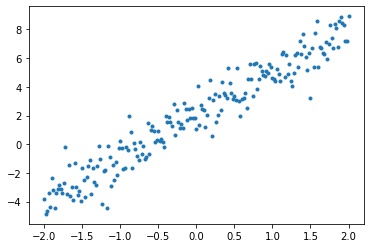

In [3]:
plt.plot(x,y,'.')
plt.show()

In [4]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(5.0)
    def __call__(self, x):
        return self.w * x + self.b

In [5]:
model = MyModel()

print("vars: ", model.variables)

# assert model(3.0).numpy() == 15

vars:  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [6]:
# loss function

def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

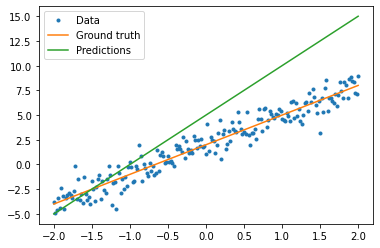

Current loss : 15.107988


In [7]:
plt.plot(x,y,'.', label="Data")
plt.plot(x, f(x), label = "Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss : %1.6f" % loss(y, model(x)).numpy())

In [8]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
    dw, db = t.gradient(current_loss, [model.w, model.b])

    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

model = MyModel()

weights = []
biases = []
epochs = range(20)

def report(model, loss):
    return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={current_loss:2.5f}"

In [9]:
def training_loop(model, x, y):
    for epoch in epochs:
        train(model, x, y, learning_rate=0.1)

        weights.append(model.w.numpy())
        biases.append(model.b.numpy())
        current_loss = loss(y, model(x))

        print(f"Epoch {epoch:2d}:")
        print("     ", report(model, current_loss))

In [10]:
current_loss = loss(y, model(x))

print(f"Starting:")
print("    ", report(model, current_loss))

training_loop(model, x, y)

Starting:
     W = 5.00, b = 5.00, loss=15.10799
Epoch  0:
      W = 4.46, b = 4.41, loss=15.10799
Epoch  1:
      W = 4.06, b = 3.94, loss=15.10799
Epoch  2:
      W = 3.77, b = 3.56, loss=15.10799
Epoch  3:
      W = 3.56, b = 3.26, loss=15.10799
Epoch  4:
      W = 3.41, b = 3.01, loss=15.10799
Epoch  5:
      W = 3.29, b = 2.82, loss=15.10799
Epoch  6:
      W = 3.21, b = 2.67, loss=15.10799
Epoch  7:
      W = 3.15, b = 2.54, loss=15.10799
Epoch  8:
      W = 3.11, b = 2.44, loss=15.10799
Epoch  9:
      W = 3.07, b = 2.36, loss=15.10799
Epoch 10:
      W = 3.05, b = 2.30, loss=15.10799
Epoch 11:
      W = 3.03, b = 2.25, loss=15.10799
Epoch 12:
      W = 3.02, b = 2.21, loss=15.10799
Epoch 13:
      W = 3.01, b = 2.18, loss=15.10799
Epoch 14:
      W = 3.00, b = 2.15, loss=15.10799
Epoch 15:
      W = 3.00, b = 2.13, loss=15.10799
Epoch 16:
      W = 3.00, b = 2.11, loss=15.10799
Epoch 17:
      W = 2.99, b = 2.10, loss=15.10799
Epoch 18:
      W = 2.99, b = 2.09, loss=15.10799
E

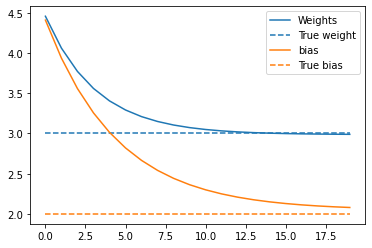

In [11]:
plt.plot(epochs, weights, label='Weights', color=colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label = "True weight", color=colors[0])

plt.plot(epochs, biases, label='bias', color=colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias", color=colors[1])

plt.legend()
plt.show()

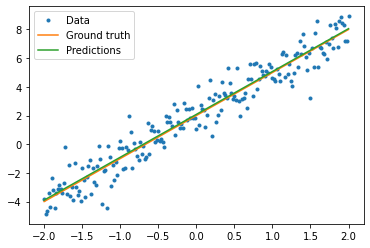

Current loss: 0.917934


In [12]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

In [13]:
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def call(self,x):
        return self.w * x + self.b

keras_model = MyModelKeras()

training_loop(keras_model, x, y)

keras_model.save_weights("my_checkpoint_keras")

Epoch  0:
      W = 4.46, b = 0.41, loss=15.10799
Epoch  1:
      W = 4.06, b = 0.74, loss=15.10799
Epoch  2:
      W = 3.77, b = 1.00, loss=15.10799
Epoch  3:
      W = 3.56, b = 1.21, loss=15.10799
Epoch  4:
      W = 3.41, b = 1.38, loss=15.10799
Epoch  5:
      W = 3.29, b = 1.51, loss=15.10799
Epoch  6:
      W = 3.21, b = 1.62, loss=15.10799
Epoch  7:
      W = 3.15, b = 1.70, loss=15.10799
Epoch  8:
      W = 3.11, b = 1.77, loss=15.10799
Epoch  9:
      W = 3.07, b = 1.83, loss=15.10799
Epoch 10:
      W = 3.05, b = 1.87, loss=15.10799
Epoch 11:
      W = 3.03, b = 1.91, loss=15.10799
Epoch 12:
      W = 3.02, b = 1.93, loss=15.10799
Epoch 13:
      W = 3.01, b = 1.96, loss=15.10799
Epoch 14:
      W = 3.00, b = 1.97, loss=15.10799
Epoch 15:
      W = 3.00, b = 1.99, loss=15.10799
Epoch 16:
      W = 3.00, b = 2.00, loss=15.10799
Epoch 17:
      W = 2.99, b = 2.01, loss=15.10799
Epoch 18:
      W = 2.99, b = 2.02, loss=15.10799
Epoch 19:
      W = 2.99, b = 2.02, loss=15.10799


In [14]:
keras_model = MyModelKeras()

keras_model.compile(run_eagerly=False, optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=tf.keras.losses.mean_squared_error)

print(x.shape[0])

keras_model.fit(x,y,epochs=10, batch_size=1000)

201
Epoch 1/10
1/1 [==============================] - 0s 230ms/step - loss: 10.5666
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 6.5128
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 4.1886
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 2.8455
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 2.0629
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.6032
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3309
Epoch 8/10
1/1 [==============================] - 0s 5ms